In [62]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 让图片中可以显示中文
plt.rcParams['font.sans-serif'] = 'SimHei'
# 让图片中可以显示负号
plt.rcParams['axes.unicode_minus'] = False

In [63]:
df = pd.read_csv("电子产品销售分析.csv")

In [64]:
df.describe()

Unnamed: 0      order_id    product_id   category_id          price  \
count  5.641690e+05  5.641690e+05  5.641690e+05  5.641690e+05  564169.000000   
mean   1.792965e+06  2.370552e+18  1.695711e+18  2.272919e+18     208.269324   
std    7.745342e+05  2.025138e+16  3.290688e+17  2.158282e+16     304.559875   
min    0.000000e+00  2.294360e+18  1.515966e+18  2.268105e+18       0.000000   
25%    1.658965e+06  2.353294e+18  1.515966e+18  2.268105e+18      23.130000   
50%    1.861597e+06  2.376886e+18  1.515966e+18  2.268105e+18      87.940000   
75%    2.473370e+06  2.388441e+18  1.515966e+18  2.268105e+18     277.750000   
max    2.633520e+06  2.388441e+18  2.388434e+18  2.374499e+18   18328.680000   

            user_id            age  
count  5.641690e+05  564169.000000  
mean   1.515916e+18      33.184388  
std    2.377083e+07      10.122088  
min    1.515916e+18      16.000000  
25%    1.515916e+18      24.000000  
50%    1.515916e+18      33.000000  
75%    1.515916e+18      42.000000  
max    1.515916e+18      50.000000

In [65]:
# 清洗df
df["price"]= df["price"].fillna(df["price"].mean())
df["price"]

0         162.01
1         162.01
2          77.52
3          77.52
4         217.57
           ...  
564164    138.87
564165    418.96
564166     12.48
564167     41.64
564168     53.22
Name: price, Length: 564169, dtype: float64

In [66]:
# 空值记录数
df.isnull().sum()
df["brand"].fillna("missing",inplace=True)
df["category_code"].fillna("missing",inplace=True)

In [67]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564169 entries, 0 to 564168
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     564169 non-null  int64  
 1   event_time     564169 non-null  object 
 2   order_id       564169 non-null  int64  
 3   product_id     564169 non-null  int64  
 4   category_id    564169 non-null  float64
 5   category_code  564169 non-null  object 
 6   brand          564169 non-null  object 
 7   price          564169 non-null  float64
 8   user_id        564169 non-null  float64
 9   age            564169 non-null  float64
 10  sex            564169 non-null  object 
 11  local          564169 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 51.7+ MB


In [68]:
df.groupby(by=["local","brand"])["order_id"].nunique()
df.groupby(by=["local","brand"])["price"].sum()


local  brand     
上海     a-case         133.33
       accesstyle     358.53
       action          25.44
       activision     138.84
       adidas         134.68
                      ...   
重庆     zeta            46.04
       zhiyun        2326.16
       zowie         1064.48
       zugo           111.12
       zwilling       435.70
Name: price, Length: 5953, dtype: float64

In [69]:
bins=[10,20,30,40,50]
df['age_box'] = pd.cut(df['age'],bins,labels=['10-20','20-30','30-40','40-50'])
df.groupby("age_box")["order_id"].nunique()

age_box
10-20     55799
20-30    113607
30-40    111425
40-50    119707
Name: order_id, dtype: int64

In [70]:
#------------------------------------------------------------------

In [71]:
df['event_time'] = pd.to_datetime(df['event_time'].str[:19],format="%Y-%m-%d %H:%M:%S")
# 添加列，方便后面数据分析
df['Month'] = df['event_time'].dt.month
df['Day'] = df['event_time'].dt.day
df['Dayofweek'] = df['event_time'].dt.dayofweek
df['hour'] = df['event_time'].dt.hour

In [72]:
#  根据用户ID和用户分组，根据price列 求平均值
pivoted_amount =df[df['price']>0].pivot_table(index='user_id',
columns='Month',
values='price',
aggfunc='mean').fillna(0)



In [76]:
# 把大于0的数据变成了1，除非还是0
pivoted_purchase = pivoted_amount.applymap(lambda x:1 if x>0 else 0)
pivoted_purchase

1  2  3  4  5  6  7  8  9  10  11
user_id                                        
1.515916e+18  0  0  0  0  0  0  1  0  0   0   0
1.515916e+18  0  0  0  0  0  0  0  0  1   1   0
1.515916e+18  0  0  0  0  0  0  0  0  0   1   1
1.515916e+18  0  0  0  0  1  1  1  0  1   1   1
1.515916e+18  0  0  0  0  1  0  1  0  0   0   0
...          .. .. .. .. .. .. .. .. ..  ..  ..
1.515916e+18  0  0  0  0  0  0  0  0  0   0   1
1.515916e+18  0  0  0  0  0  0  0  0  0   0   1
1.515916e+18  0  0  0  0  0  0  0  0  0   0   1
1.515916e+18  0  0  0  0  0  0  0  0  0   0   1
1.515916e+18  0  0  0  0  0  0  0  0  0   0   1

[93818 rows x 11 columns]

In [77]:
columns_month = df['Month'].sort_values().astype('str').unique()
pivoted_amount.columns = columns_month
pivoted_amount.columns



Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'], dtype='object')

In [78]:
# applymap: DataFrame专有, 其中的x是DataFrame中每个元素
# map()函数: 适合处理某一单独的列
#apply()函数：既支持 Series 每一个元素，也支持 DataFrame  传递的行或列 ,默认传递列
def active_status(data):
#存储当前用户的状态信息，如：unreg→未注册；unactive→未激活；new→新用户；return→回流
	status =[]
	for i in range(11):  # 遍历0-10
		#若本月没有消费
		if data[i] ==0:
			# 列表中有状态信息，
			if len(status)>0:
				# 若上一个取值为未注册，那么，当前月份的状态也是“未注册”
				if status[i-1]=='unreg':
					status.append('unreg')
				else:
					status.append('unactive')
			# 列表中没有状态信息
			else:
				#将用户的状态置为“未注册”
				status.append('unreg')
			#若本月消费
		else:
			if len(status)==0:
				status.append('new')
			else:
				if status[i-1]=='unactive':
					status.append('return')
				elif status[i-1]=='unreg':
					status.append('new')
				else:
					status.append('active')
	return pd.Series(status,index=columns_month)
# apply 传递的行
pivoted_purchase_status = pivoted_purchase.apply(lambda x:active_status(x),axis=1)
pivoted_purchase_status

1      2      3      4      5         6       7         8  \
user_id                                                                       
1.515916e+18  unreg  unreg  unreg  unreg  unreg     unreg     new  unactive   
1.515916e+18  unreg  unreg  unreg  unreg  unreg     unreg   unreg     unreg   
1.515916e+18  unreg  unreg  unreg  unreg  unreg     unreg   unreg     unreg   
1.515916e+18  unreg  unreg  unreg  unreg    new    active  active  unactive   
1.515916e+18  unreg  unreg  unreg  unreg    new  unactive  return  unactive   
...             ...    ...    ...    ...    ...       ...     ...       ...   
1.515916e+18  unreg  unreg  unreg  unreg  unreg     unreg   unreg     unreg   
1.515916e+18  unreg  unreg  unreg  unreg  unreg     unreg   unreg     unreg   
1.515916e+18  unreg  unreg  unreg  unreg  unreg     unreg   unreg     unreg   
1.515916e+18  unreg  unreg  unreg  unreg  unreg     unreg   unreg     unreg   
1.515916e+18  unreg  unreg  unreg  unreg  unreg     unreg   unreg     unreg   

                     9        10        11  
user_id                                     
1.515916e+18  unactive  unactive  unactive  
1.515916e+18       new    active  unactive  
1.515916e+18     unreg       new    active  
1.515916e+18    return    active    active  
1.515916e+18  unactive  unactive  unactive  
...                ...       ...       ...  
1.515916e+18     unreg     unreg       new  
1.515916e+18     unreg     unreg       new  
1.515916e+18     unreg     unreg       new  
1.515916e+18     unreg     unreg       new  
1.515916e+18     unreg     unreg       new  

[93818 rows x 11 columns]

In [79]:
purchase_status_counts_tmp= pivoted_purchase_status.replace('unreg',np.NaN)
purchase_status_counts_tmp

1    2    3    4    5         6       7         8         9  \
user_id                                                                       
1.515916e+18  NaN  NaN  NaN  NaN  NaN       NaN     new  unactive  unactive   
1.515916e+18  NaN  NaN  NaN  NaN  NaN       NaN     NaN       NaN       new   
1.515916e+18  NaN  NaN  NaN  NaN  NaN       NaN     NaN       NaN       NaN   
1.515916e+18  NaN  NaN  NaN  NaN  new    active  active  unactive    return   
1.515916e+18  NaN  NaN  NaN  NaN  new  unactive  return  unactive  unactive   
...           ...  ...  ...  ...  ...       ...     ...       ...       ...   
1.515916e+18  NaN  NaN  NaN  NaN  NaN       NaN     NaN       NaN       NaN   
1.515916e+18  NaN  NaN  NaN  NaN  NaN       NaN     NaN       NaN       NaN   
1.515916e+18  NaN  NaN  NaN  NaN  NaN       NaN     NaN       NaN       NaN   
1.515916e+18  NaN  NaN  NaN  NaN  NaN       NaN     NaN       NaN       NaN   
1.515916e+18  NaN  NaN  NaN  NaN  NaN       NaN     NaN       NaN       NaN   

                    10        11  
user_id                           
1.515916e+18  unactive  unactive  
1.515916e+18    active  unactive  
1.515916e+18       new    active  
1.515916e+18    active    active  
1.515916e+18  unactive  unactive  
...                ...       ...  
1.515916e+18       NaN       new  
1.515916e+18       NaN       new  
1.515916e+18       NaN       new  
1.515916e+18       NaN       new  
1.515916e+18       NaN       new  

[93818 rows x 11 columns]

In [80]:
purchase_status_counts=purchase_status_counts_tmp.apply(lambda x:pd.value_counts(x))
purchase_status_counts


1       2     3     4      5      6      7      8      9  \
active       NaN   671.0   847   822   1930   3755   4457   9016   7387   
new       1987.0  1627.0  1493  4239  14099   9075  22271  22232   8200   
return       NaN     NaN   283   457   1444   1315   3578   4363   4298   
unactive     NaN  1316.0  2484  3828   5972  18375  24485  41412  65338   

             10     11  
active     5084   3205  
new        5640   2955  
return     3868   2500  
unactive  76271  85158

In [81]:
purchase_status_counts_data = purchase_status_counts.fillna(0).T
purchase_status_counts_data.loc[:,"active":"new"]
active_data = purchase_status_counts_data["active"]
new_data = purchase_status_counts_data["new"]

<Figure size 800x500 with 0 Axes>

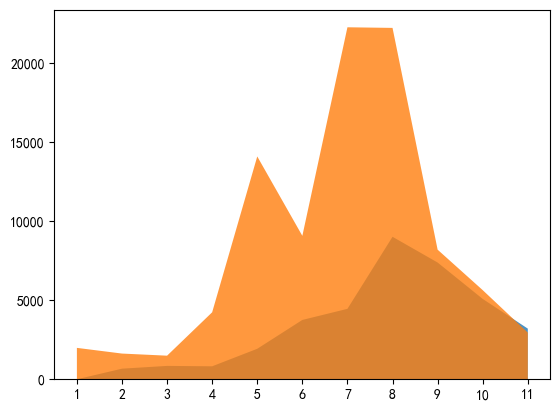

In [82]:
fig = plt.figure(figsize=(8, 5))
plt.figure(dpi=100)
plt.stackplot(active_data.index, active_data.values, alpha=0.8)
plt.stackplot(new_data.index, new_data.values, alpha=0.8)
plt.show()

In [ ]:
#  每月回流用户和回流率
# 回流率= 每月回流用户/总用户()
return_data = purchase_status_counts_data.loc[:,"return"]/purchase_status_counts_data.loc[:,"active"]
return_data = pd.DataFrame(return_data.fillna(0))

plt.plot(return_data.index, return_data.values)
plt.xlabel("月份")
plt.ylabel("回流率")
plt.title("回流率")


In [83]:
# 计算每个年龄和性别的总人数
age_gender_counts = df.groupby(['age_box', 'sex',"brand"]).size().reset_index(name='total')
age_gender_counts
brand_count = age_gender_counts.groupby("brand")["total"].sum()
brand_count
def fun(x):
	return  brand_count[x]
age_gender_counts["x"] = age_gender_counts["brand"].apply(fun)
age_gender_counts["st"] = age_gender_counts["total"]/age_gender_counts["x"]
age_gender_counts
st_data = age_gender_counts.pivot_table(index="brand",columns=["age_box","sex"])


st                                                    \
age_box        10-20               20-30               30-40             
sex                女         男         女         男         女         男   
brand                                                                    
a-case      0.061017  0.081356  0.149153  0.111864  0.162712  0.145763   
acana       0.000000  0.333333  0.000000  0.000000  0.000000  0.333333   
accesstyle  0.016129  0.064516  0.112903  0.145161  0.096774  0.177419   
action      0.000000  0.000000  0.000000  0.333333  0.333333  0.000000   
activision  0.117647  0.000000  0.117647  0.117647  0.117647  0.117647   
...              ...       ...       ...       ...       ...       ...   
zhorka      0.000000  0.000000  0.055556  0.000000  0.111111  0.000000   
zlatek      0.500000  0.000000  0.000000  0.000000  0.000000  0.500000   
zowie       0.075000  0.058333  0.150000  0.112500  0.162500  0.137500   
zugo        0.086957  0.000000  0.260870  0.130435  0.043478  0.304348   
zwilling    0.016529  0.082645  0.190083  0.033058  0.148760  0.272727   

                               total      ...               x                  \
age_box        40-50           10-20      ... 40-50     10-20      20-30        
sex                女         男     女   男  ...     女   男     女    男     女    男   
brand                                     ...                                   
a-case      0.155932  0.132203    18  24  ...    46  39   295  295   295  295   
acana       0.000000  0.333333     0   1  ...     0   1     3    3     3    3   
accesstyle  0.145161  0.241935     1   4  ...     9  15    62   62    62   62   
action      0.333333  0.000000     0   0  ...     1   0     3    3     3    3   
activision  0.235294  0.176471     2   0  ...     4   3    17   17    17   17   
...              ...       ...   ...  ..  ...   ...  ..   ...  ...   ...  ...   
zhorka      0.666667  0.166667     0   0  ...    12   3    18   18    18   18   
zlatek      0.000000  0.000000     1   0  ...     0   0     2    2     2    2   
zowie       0.162500  0.141667    18  14  ...    39  34   240  240   240  240   
zugo        0.130435  0.043478     2   0  ...     3   1    23   23    23   23   
zwilling    0.115702  0.140496     2  10  ...    14  17   121  121   121  121   

                                  
age_box    30-40      40-50       
sex            女    男     女    男  
brand                             
a-case       295  295   295  295  
acana          3    3     3    3  
accesstyle    62   62    62   62  
action         3    3     3    3  
activision    17   17    17   17  
...          ...  ...   ...  ...  
zhorka        18   18    18   18  
zlatek         2    2     2    2  
zowie        240  240   240  240  
zugo          23   23    23   23  
zwilling     121  121   121  121  

[869 rows x 24 columns]

In [87]:
st_head_5 = st_data.loc[:,"st"].head(5)

age_box        10-20               20-30               30-40            \
sex                女         男         女         男         女         男   
brand                                                                    
a-case      0.061017  0.081356  0.149153  0.111864  0.162712  0.145763   
acana       0.000000  0.333333  0.000000  0.000000  0.000000  0.333333   
accesstyle  0.016129  0.064516  0.112903  0.145161  0.096774  0.177419   
action      0.000000  0.000000  0.000000  0.333333  0.333333  0.000000   
activision  0.117647  0.000000  0.117647  0.117647  0.117647  0.117647   

age_box        40-50            
sex                女         男  
brand                           
a-case      0.155932  0.132203  
acana       0.000000  0.333333  
accesstyle  0.145161  0.241935  
action      0.333333  0.000000  
activision  0.235294  0.176471

<AxesSubplot:xlabel='brand'>

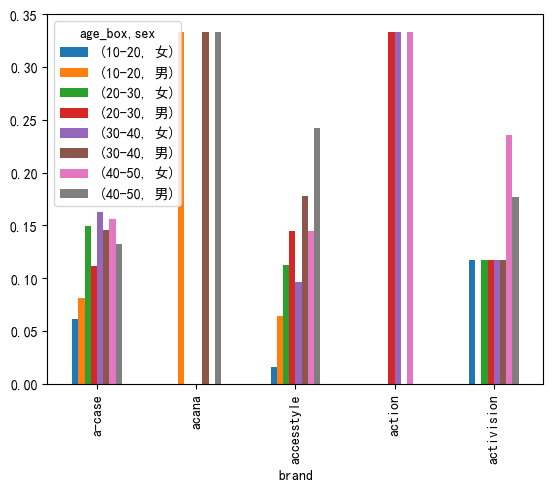

In [88]:
st_head_5.plot.bar()
